In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# set working directory
import os
import sys

sys.path.append('/lnet/work/people/limisiewicz/dama/DAMA/src')

In [19]:
import os
import numpy as np
from matplotlib import pyplot as plt
import json
from transformers import AutoTokenizer
import scipy
import seaborn as sns
import pandas as pd

from utils.notebooks_utils import read_data, aggregate_token_scores, plot_correlations, plot_effect_against_bias, plot_linear_coefficients, plot_joint_linear_coefficients
from utils.globals import *

In [20]:
OUTPUT_DIR = '../../../paper_output/'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
# plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 16

Load the data from pre-computed casual effects: LLaMA2, ALMA, Tower

In [21]:
n_examples = "all"
parameter_size = 13
model_name = "_Llama_2_13b_hf"
data_path = os.path.join("/home/limisiewicz/my-luster/dama/results", f"results_known_{parameter_size}B_disable_mlp{model_name}_{n_examples}.jsonl")

# load jsons line by line
data = []
with open(data_path, "r") as f:
    for line in f:
        data.append(json.loads(line))


model_name = "_TowerInstruct_13B_v0.1"
data_path = os.path.join("/home/limisiewicz/my-luster/dama/results", f"results_known_{parameter_size}B_disable_mlp{model_name}_{n_examples}.jsonl")

# load jsons line by line
tower_data = []
with open(data_path, "r") as f:
    for line in f:
        tower_data.append(json.loads(line))

model_name = "_ALMA_13B_R"
data_path = os.path.join("/home/limisiewicz/my-luster/dama/results", f"results_known_{parameter_size}B_disable_mlp{model_name}_{n_examples}.jsonl")

alma_data = []
with open(data_path, "r") as f:
    for line in f:
        alma_data.append(json.loads(line))


# 7B model
model_name = "_Llama_2_7b_hf"
data_path = os.path.join("/home/limisiewicz/my-luster/dama/results", f"results_known_{7}B_disable_mlp{model_name}_{n_examples}.jsonl")

smaller_data = []
with open(data_path, "r") as f:
    for line in f:
        smaller_data.append(json.loads(line))

load tokenizers

In [22]:
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-13b-hf" , add_bos_token=False, use_fast=False)
tower_tokenizer = AutoTokenizer.from_pretrained("Unbabel/TowerInstruct-13B-v0.1", add_bos_token=False, use_fast=False)
alma_tokenizer= AutoTokenizer.from_pretrained("haoranxu/ALMA-13B-R", add_bos_token=False, use_fast=False)

In [23]:

for kind in ["null", "mlp", "attn"]:
    for data_row in data:
        data_row[kind]["scores_aggregated"] = aggregate_token_scores(data_row, tokenizer, kind=kind)

for kind in ["null", "mlp", "attn"]:
    for tower_data_row in tower_data:
        tower_data_row[kind]["scores_aggregated"] = aggregate_token_scores(tower_data_row, tower_tokenizer, kind=kind)

for kind in ["null", "mlp", "attn"]:
    for alma_data_row in alma_data:
        alma_data_row[kind]["scores_aggregated"] = aggregate_token_scores(alma_data_row, alma_tokenizer, kind=kind)

for kind in ["null", "mlp", "attn"]:
    for smaller_data_row in smaller_data:
        smaller_data_row[kind]["scores_aggregated"] = aggregate_token_scores(smaller_data_row, tokenizer, kind=kind)

Load the crowd-sourced factual ans sterotypical scores.

In [24]:
prof_data_path = os.path.join("/home/limisiewicz/my-luster/GenderBiasGACR/data", f"professions.json")

# load json data
with open(prof_data_path, "r") as f:
    professions = json.load(f)

professions = {prof: {'factual': f, 'stereotypical': s} for (prof, f, s)  in professions}

# 7B Models: LLaMA 2


TE coefficients: stereotypical a_s=0.18714262437112184, factual a_f=0.3042265157537174, intercept b=0.12137321541886159, r2=0.3589904297994866
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


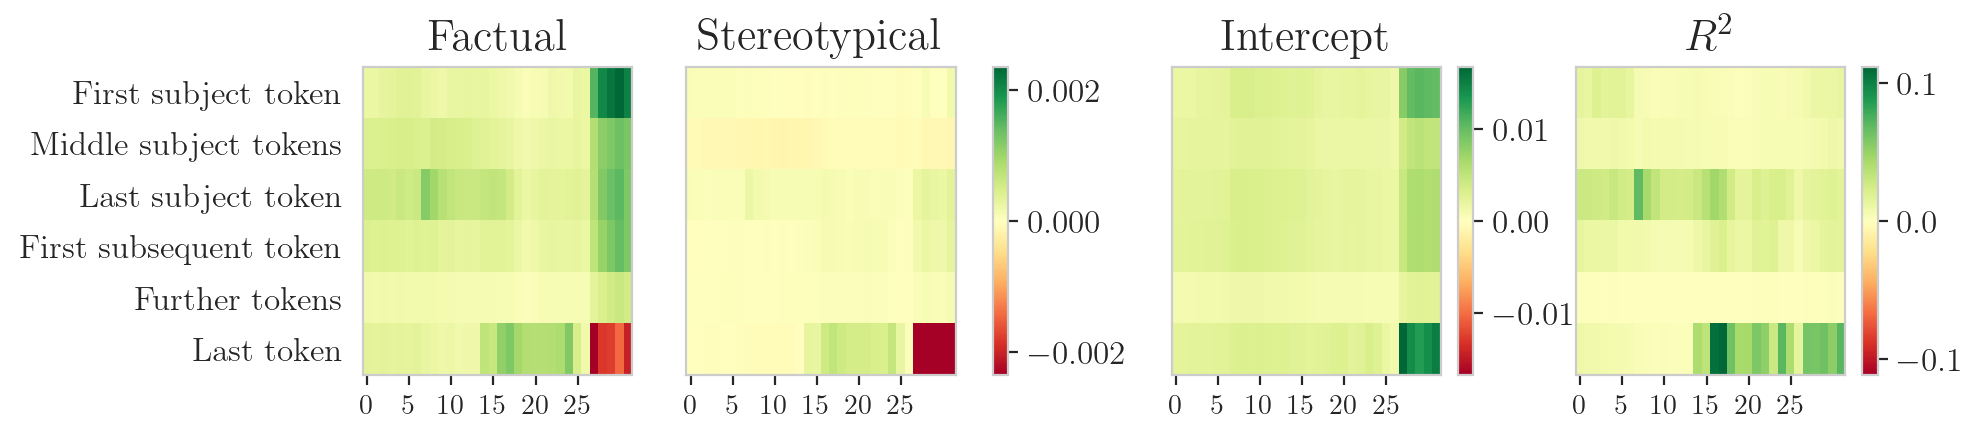

TE coefficients: stereotypical a_s=0.18714262437112184, factual a_f=0.3042265157537174, intercept b=0.12137321541886159, r2=0.3589904297994866
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


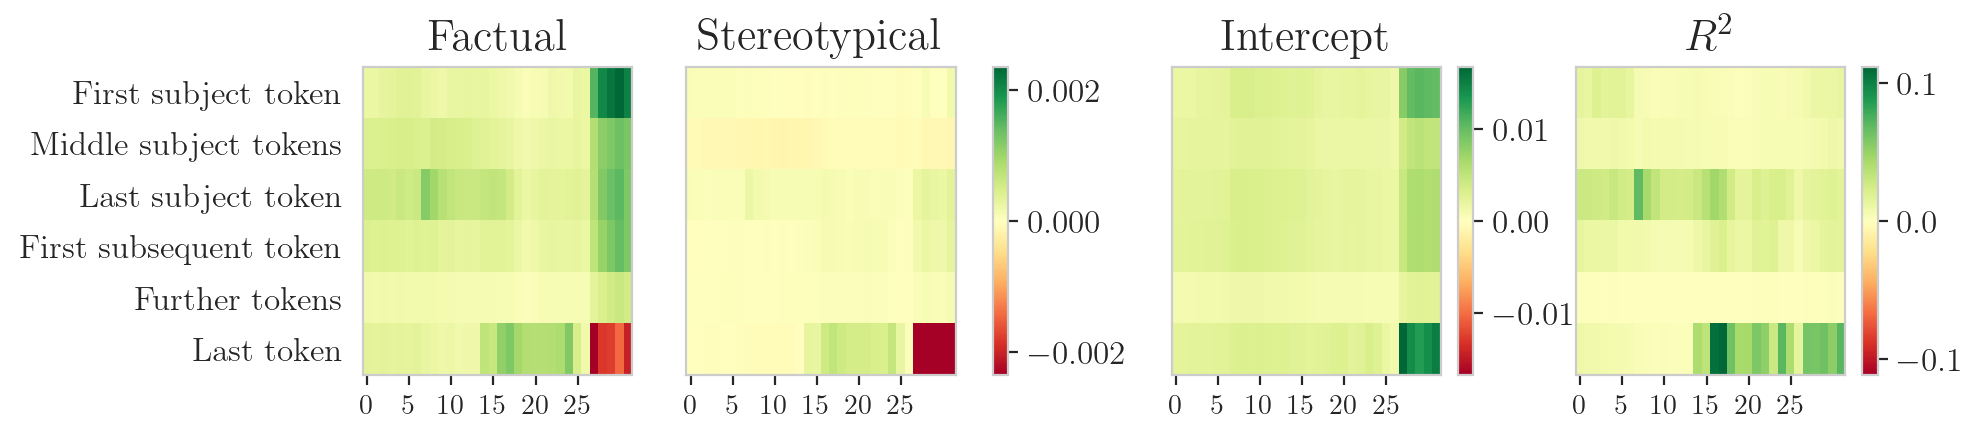

In [25]:
f_acoff, s_acoff, b_coff, r2 = plot_joint_linear_coefficients(smaller_data, professions, kind="mlp", model_name="llama_2", savedir=OUTPUT_DIR,param=7)

TE coefficients: stereotypical a_s=0.18714262437112184, factual a_f=0.3042265157537174, intercept b=0.12137321541886159, r2=0.3589904297994866
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


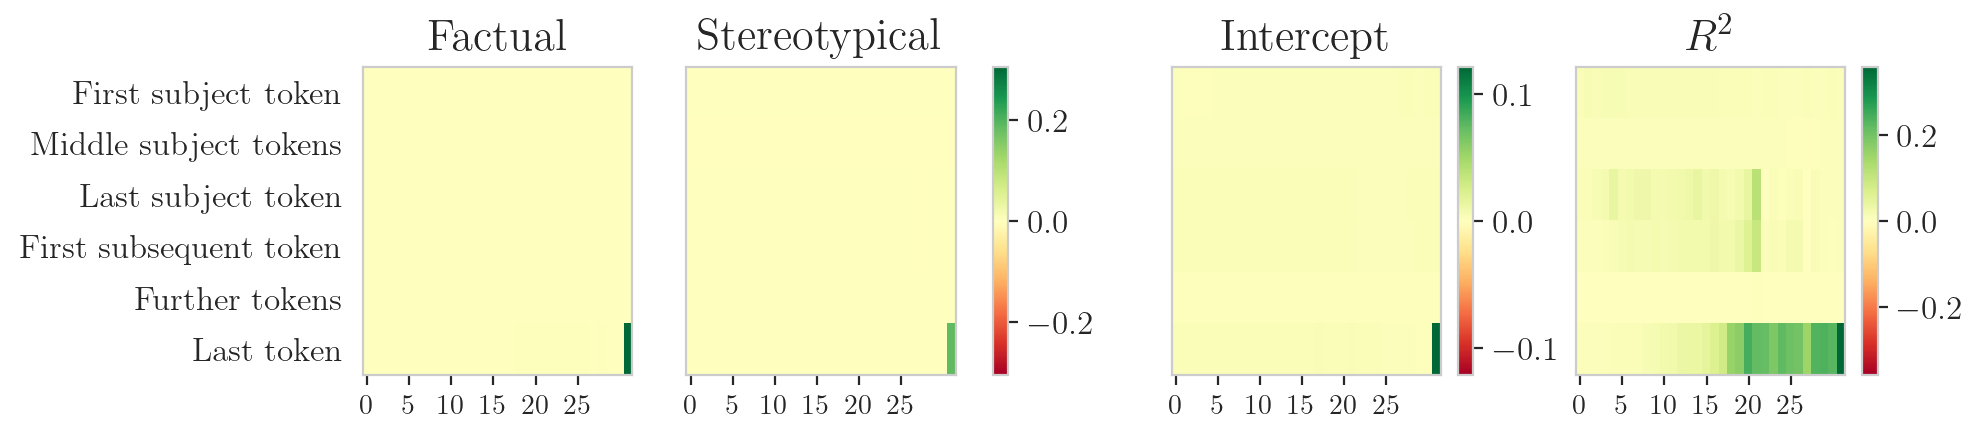

TE coefficients: stereotypical a_s=0.18714262437112184, factual a_f=0.3042265157537174, intercept b=0.12137321541886159, r2=0.3589904297994866
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


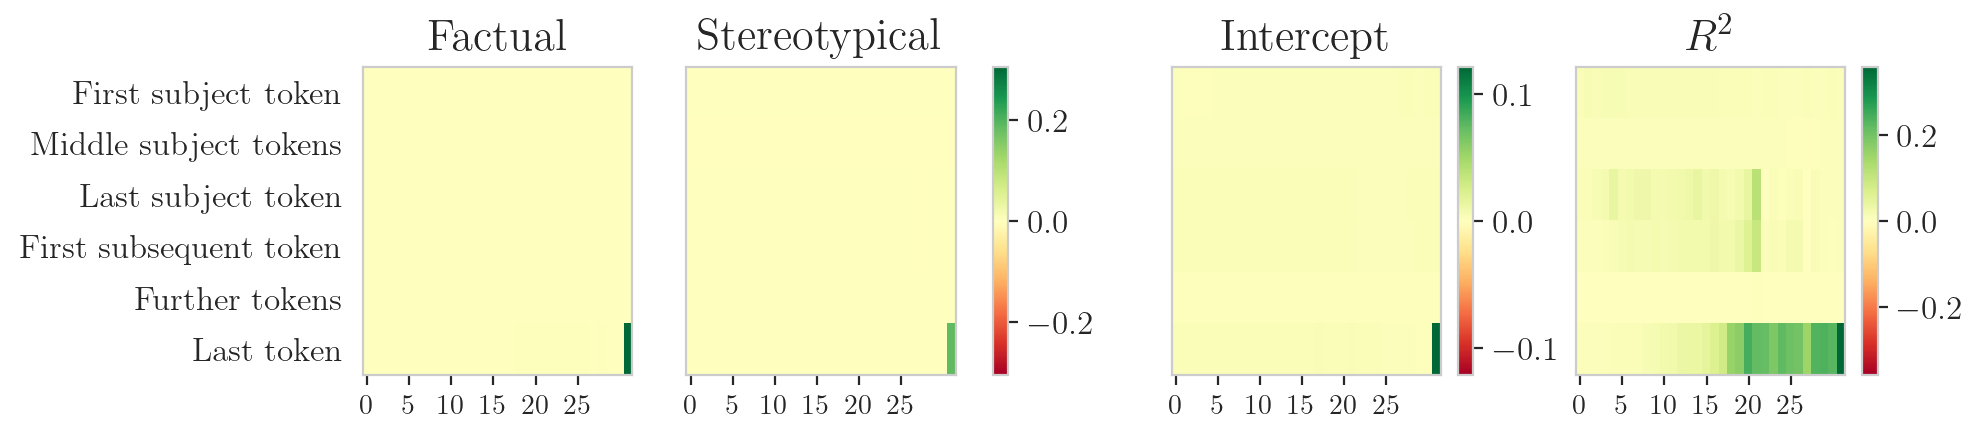

In [26]:
f_acoff, s_acoff, b_coff, r2 = plot_joint_linear_coefficients(smaller_data, professions, kind="null")

# 13 B LLaMA 2 + Tower + ALMA 13B results

TE coefficients: stereotypical a_s=0.19420526017393275, factual a_f=0.31337611313724567, intercept b=0.13215416317475503, r2=0.36584329945114524
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


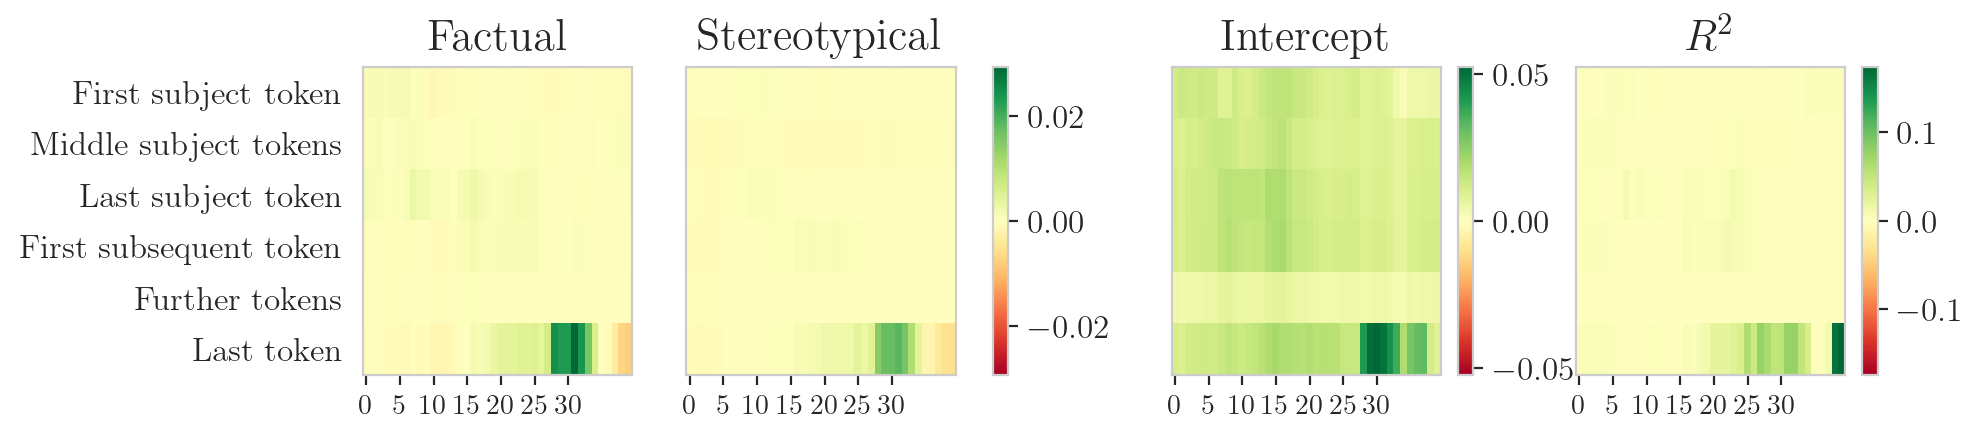

TE coefficients: stereotypical a_s=0.19420526017393275, factual a_f=0.31337611313724567, intercept b=0.13215416317475503, r2=0.36584329945114524
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


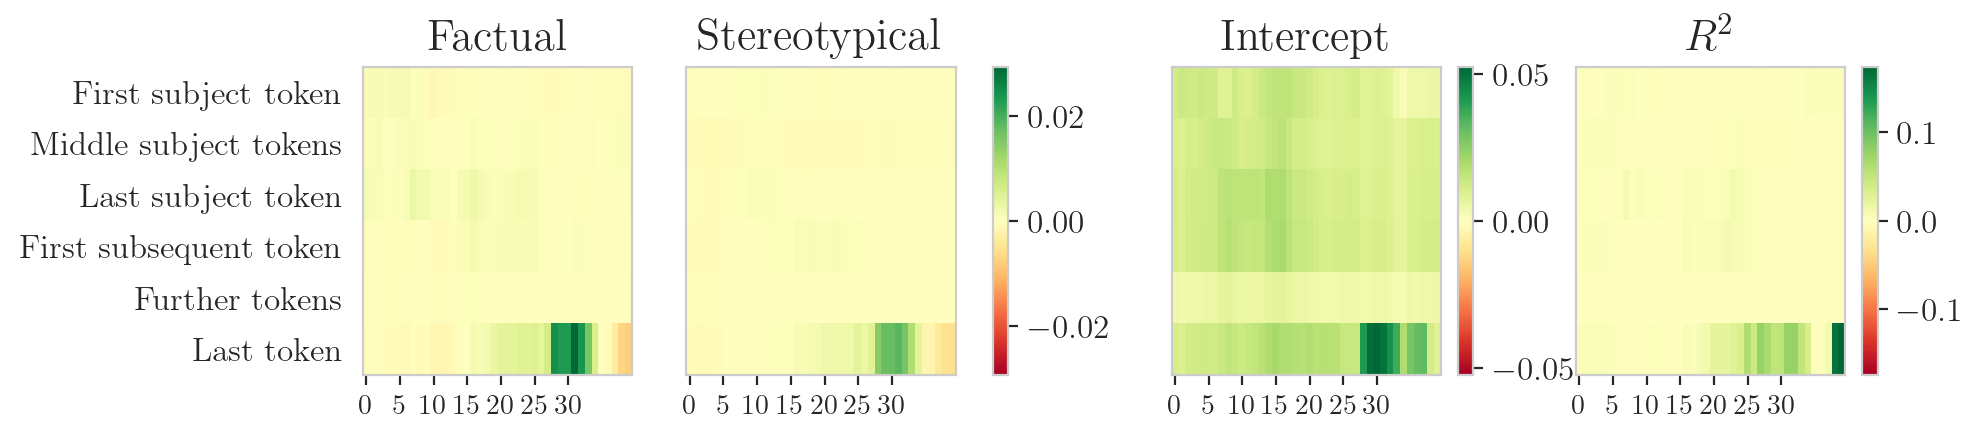

In [27]:
f_acoff, s_acoff, b_coff, r2 = plot_joint_linear_coefficients(data, professions, kind="mlp", model_name="llama_2", savedir=OUTPUT_DIR,param=13)

TE coefficients: stereotypical a_s=0.19420526017393275, factual a_f=0.31337611313724567, intercept b=0.13215416317475503, r2=0.36584329945114524
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


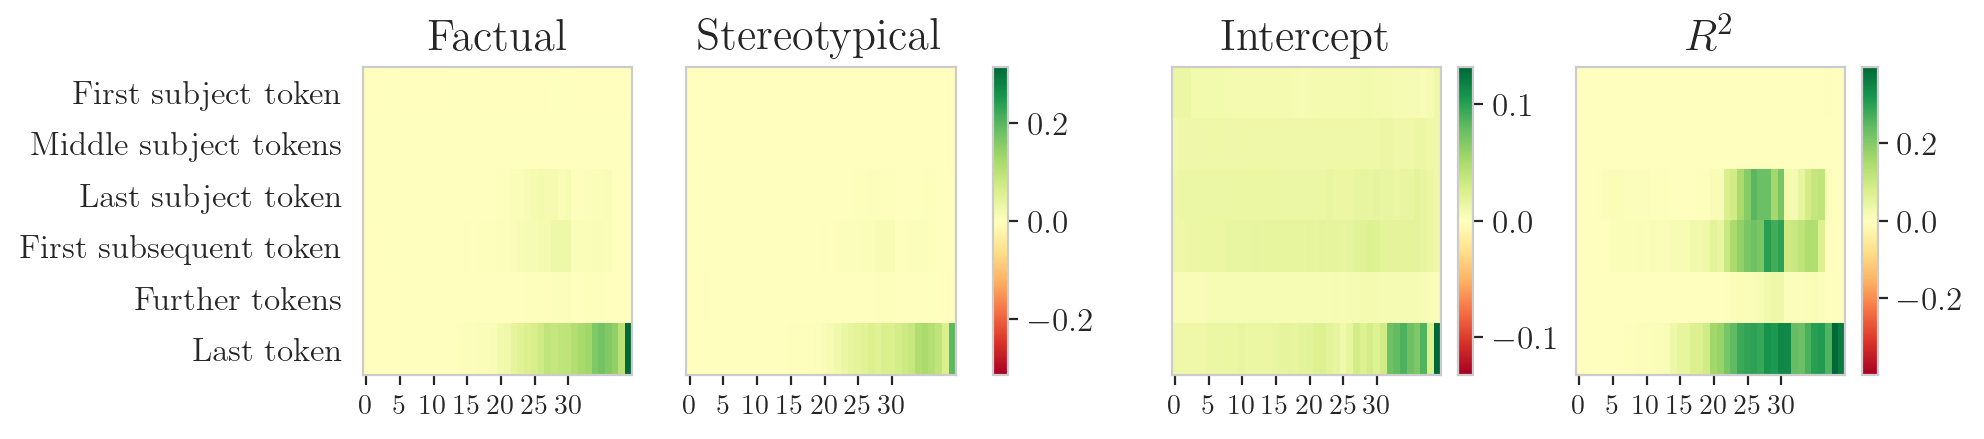

TE coefficients: stereotypical a_s=0.19420526017393275, factual a_f=0.31337611313724567, intercept b=0.13215416317475503, r2=0.36584329945114524
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


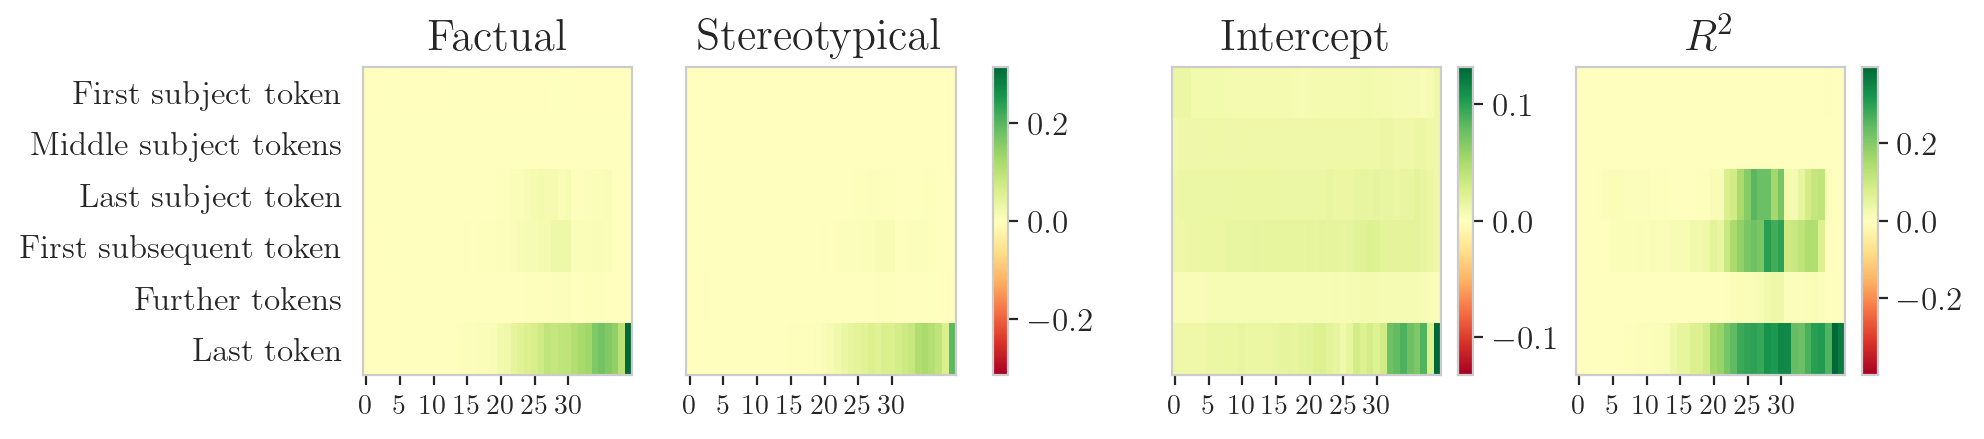

In [28]:
f_acoff, s_acoff, b_coff, r2 = plot_joint_linear_coefficients(data, professions, kind="null")

## Translation adaptations

TE coefficients: stereotypical a_s=0.21870896973404447, factual a_f=0.3521465167522676, intercept b=0.14430388054852283, r2=0.34466856239931765
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


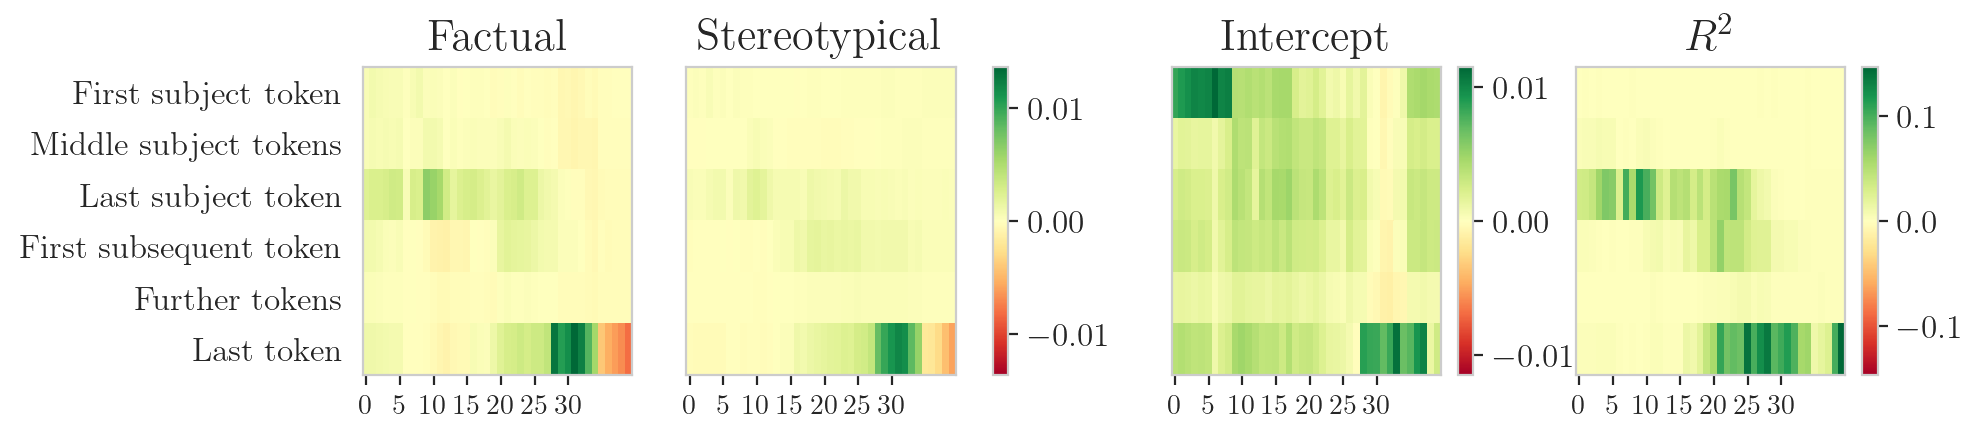

TE coefficients: stereotypical a_s=0.21870896973404447, factual a_f=0.3521465167522676, intercept b=0.14430388054852283, r2=0.34466856239931765
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


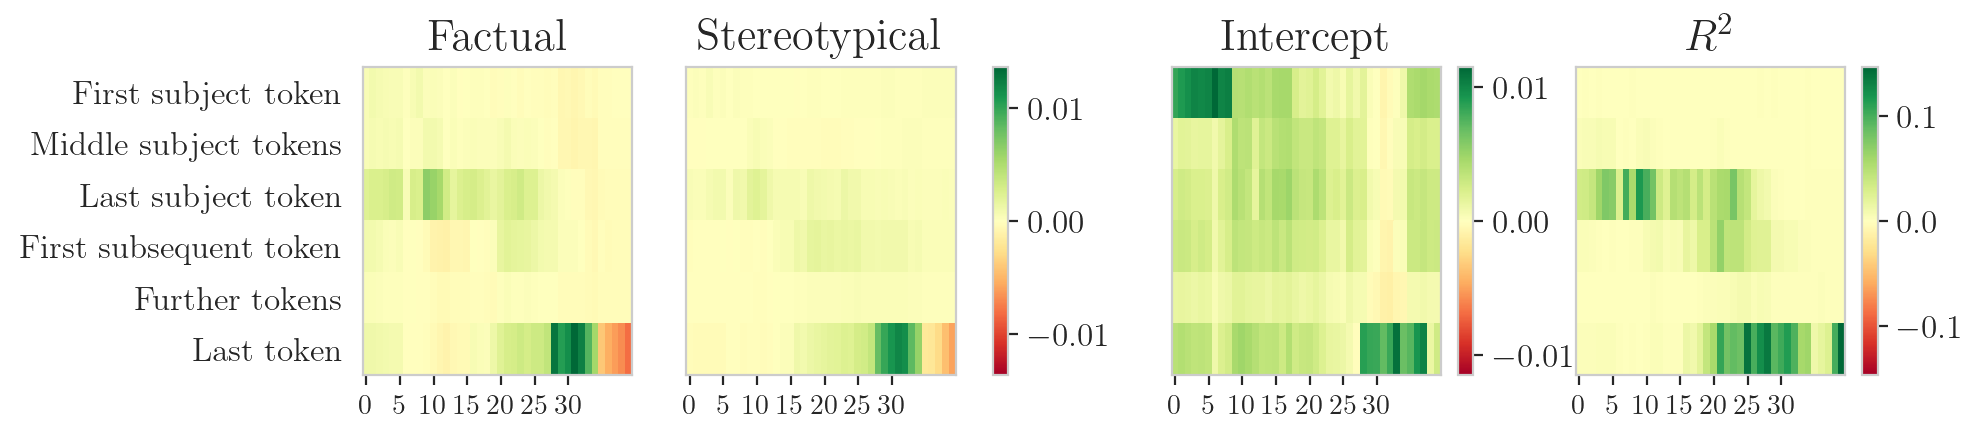

In [29]:
f_acoff, s_acoff, b_coff, lr2 = plot_joint_linear_coefficients(tower_data, professions, kind="mlp", model_name="tower", savedir=OUTPUT_DIR,param=13)

TE coefficients: stereotypical a_s=0.21870896973404447, factual a_f=0.3521465167522676, intercept b=0.14430388054852283, r2=0.34466856239931765
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


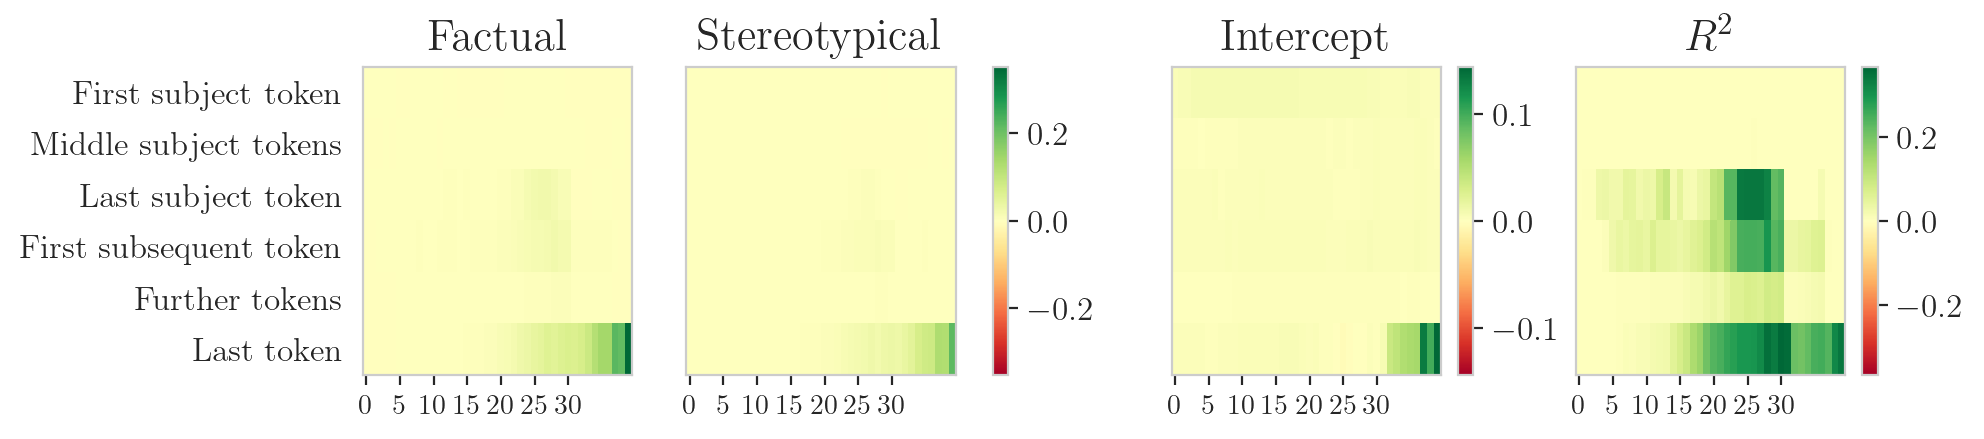

TE coefficients: stereotypical a_s=0.21870896973404447, factual a_f=0.3521465167522676, intercept b=0.14430388054852283, r2=0.34466856239931765
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


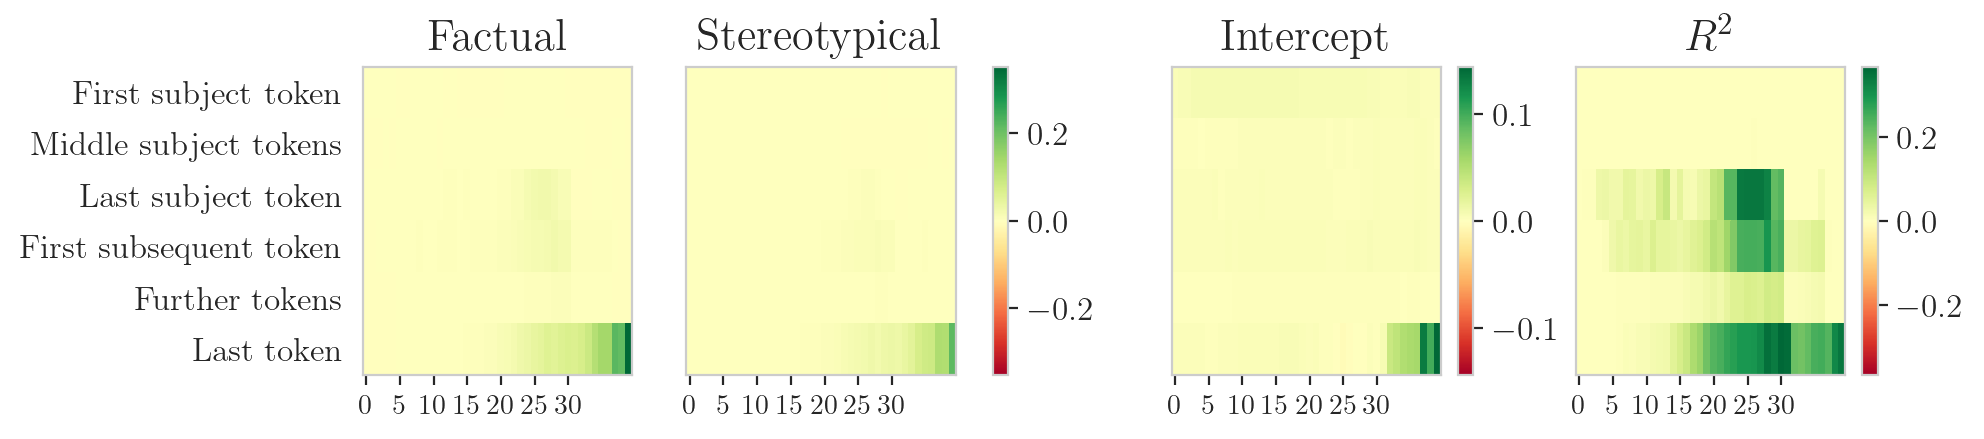

In [30]:
f_acoff, s_acoff, b_coff, r2 = plot_joint_linear_coefficients(tower_data, professions, kind="null")

TE coefficients: stereotypical a_s=0.2194258100422815, factual a_f=0.34942754721785296, intercept b=0.13620397462827288, r2=0.37891361057133055
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


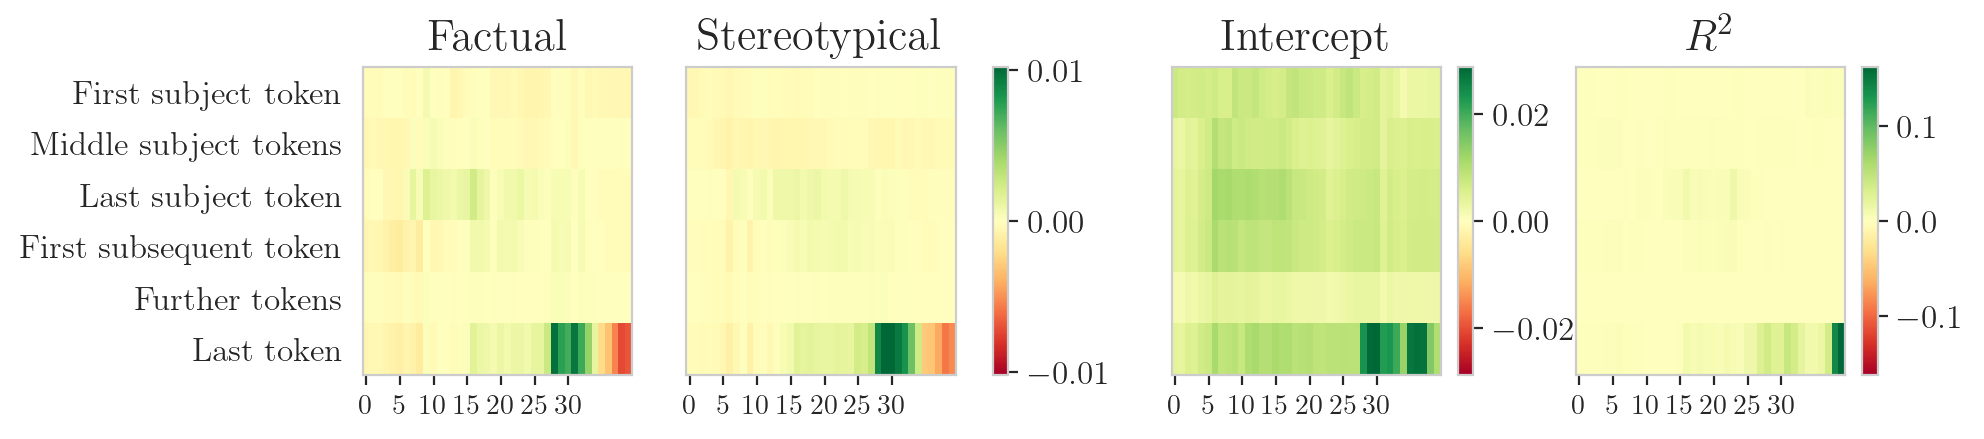

TE coefficients: stereotypical a_s=0.2194258100422815, factual a_f=0.34942754721785296, intercept b=0.13620397462827288, r2=0.37891361057133055
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


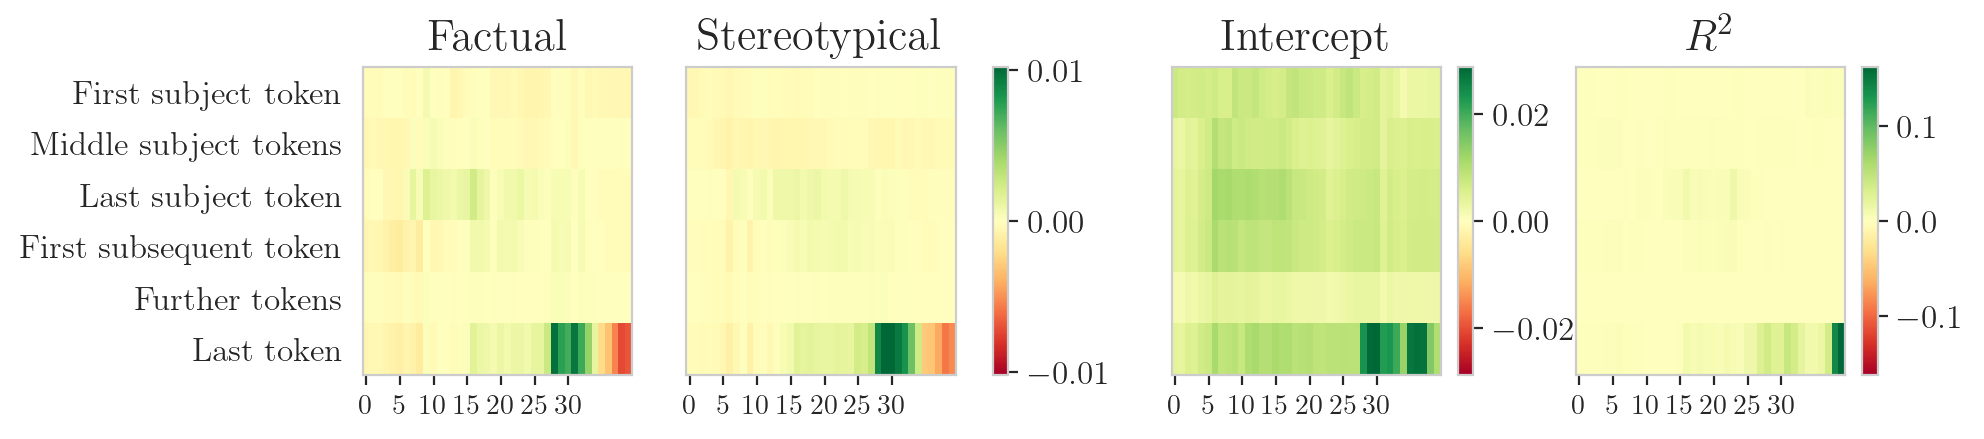

In [31]:
f_acoff, s_acoff, b_coff, r2 = plot_joint_linear_coefficients(alma_data, professions, kind="mlp", model_name="alma_r", savedir=OUTPUT_DIR,param=13)

TE coefficients: stereotypical a_s=0.2194258100422815, factual a_f=0.34942754721785296, intercept b=0.13620397462827288, r2=0.37891361057133055
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


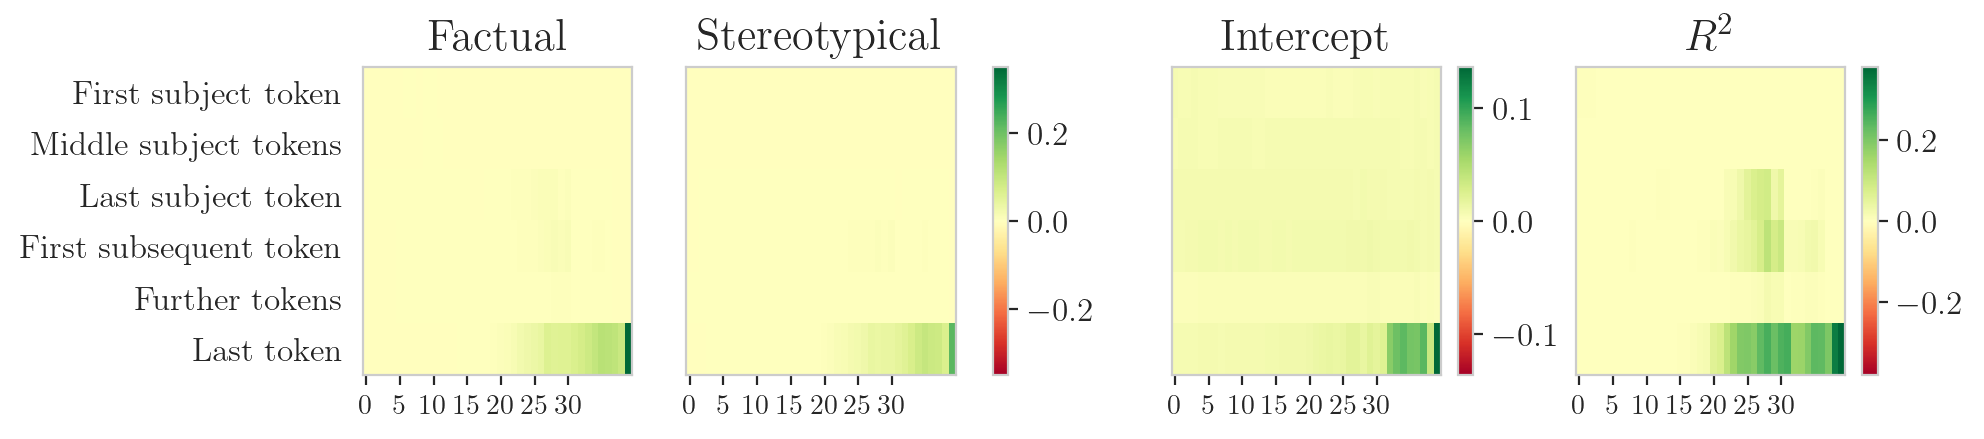

TE coefficients: stereotypical a_s=0.2194258100422815, factual a_f=0.34942754721785296, intercept b=0.13620397462827288, r2=0.37891361057133055
Factual vs stereotypical correlation:  PearsonRResult(statistic=0.2572781642553873, pvalue=2.5101061713436513e-54)


/lnet/work/people/limisiewicz/dama/DAMA/src/utils/notebooks_utils.py:467: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(TOKEN_POSITION_MAP)


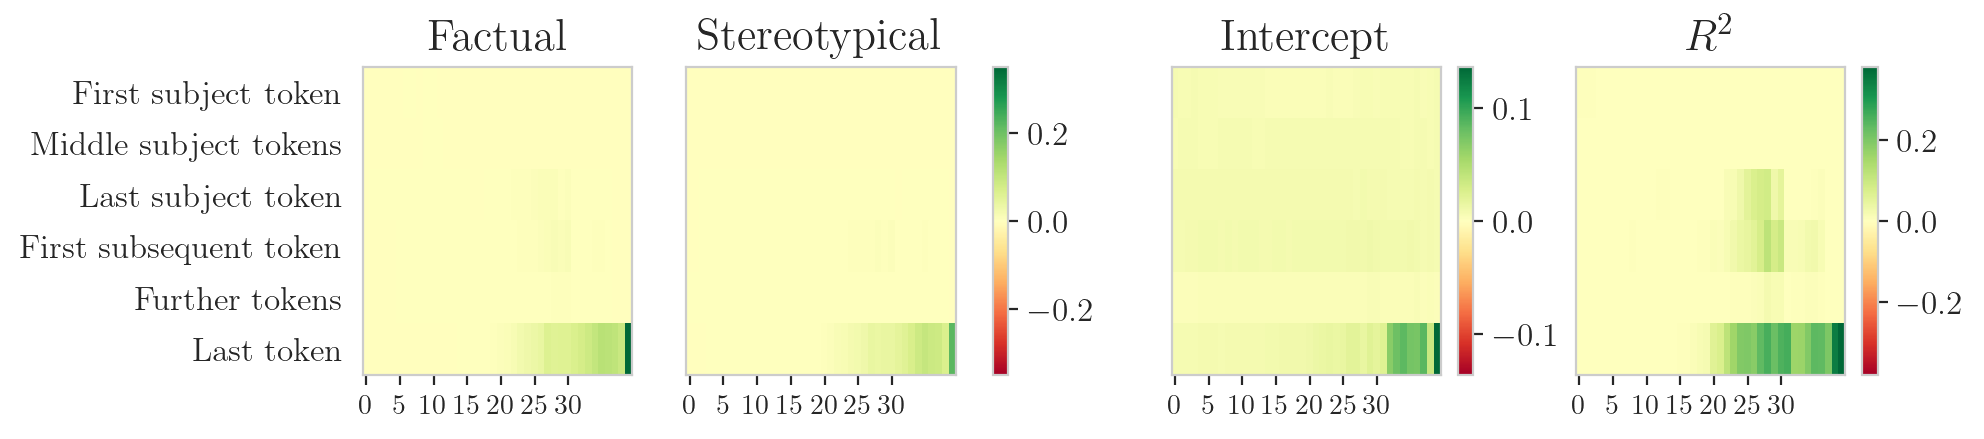

In [32]:
f_acoff, s_acoff, b_coff, r2 = plot_joint_linear_coefficients(alma_data, professions, kind="null")